In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
USvideos = pd.read_csv("USvideos.csv")

In [3]:
USvideos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
USvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


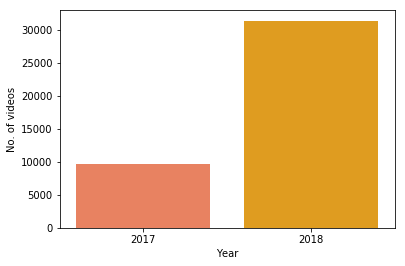

In [6]:
#Looking over time for number of videos

cdf = USvideos["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index().\
rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [7]:
#Importing JSON to merge groupwise categories

import json

def category_name(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))
        

In [8]:
categories = category_name("US_category_id.json")

In [9]:
categories = pd.DataFrame(list(categories.items()), columns = ["cat_id", "cat_desc"])

In [10]:
categories["cat_id"] = categories["cat_id"].astype(int)

In [11]:
#Joining two tables to get category information

USvideos = USvideos.merge(categories, left_on = ["category_id"], right_on = ["cat_id"], how = "left")
del USvideos["cat_id"]

In [12]:
#Summary table over categories

USvideos.groupby(["cat_desc"]).agg({"video_id":"count","views":"mean", "likes":"mean", "dislikes":"mean", "comment_count":"mean"})

,video_id,views,likes,dislikes,comment_count
cat_desc,,,,,
Autos & Vehicles,384,1.355965e+06,11056.395833,632.838542,2042.830729
Comedy,3457,1.480308e+06,62582.223315,2091.521840,6521.718831
Education,1656,7.129408e+05,29745.031401,816.408213,3286.378019
Entertainment,9964,2.067883e+06,53243.325070,4314.297772,7383.229426
Film & Animation,2345,3.106250e+06,70787.836247,2590.681450,7627.744136
Gaming,817,2.620831e+06,84502.183599,11241.696450,18042.488372
Howto & Style,4146,9.837301e+05,39286.076942,1320.284370,5583.586589
Music,6472,6.201003e+06,218918.199011,7907.757726,19359.764524
News & Politics,2487,5.925877e+05,7298.364696,1680.759550,2428.400885


Text(0.5, 1.0, 'Top 5 Videos that trended maximum days in USA')

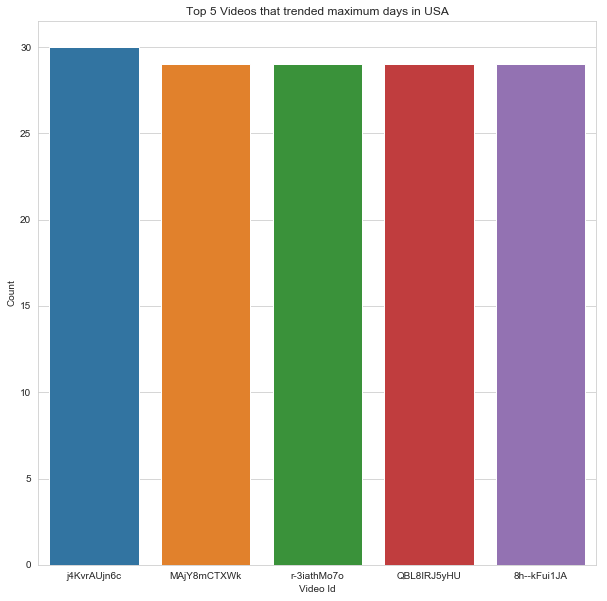

In [13]:
#Finding trend over how much time videos have trended

USvideos_max_days_trend=USvideos.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

In [14]:
#Creating tokenizers to see popularity of words


from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

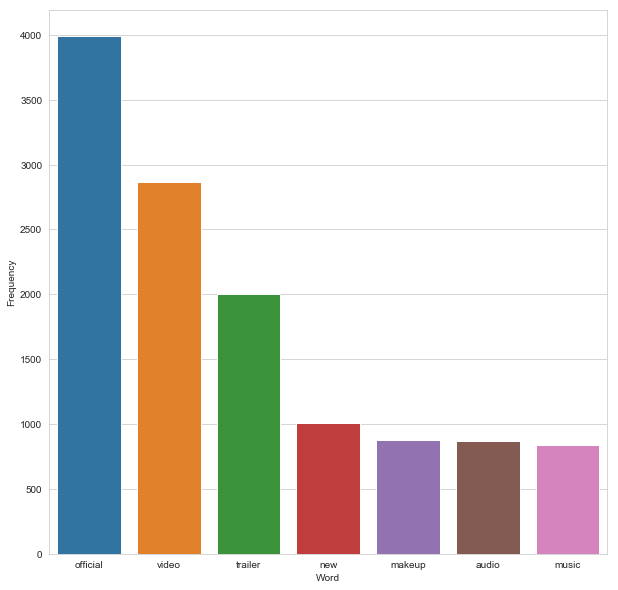

In [15]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

#top-100 words
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = USvideos['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

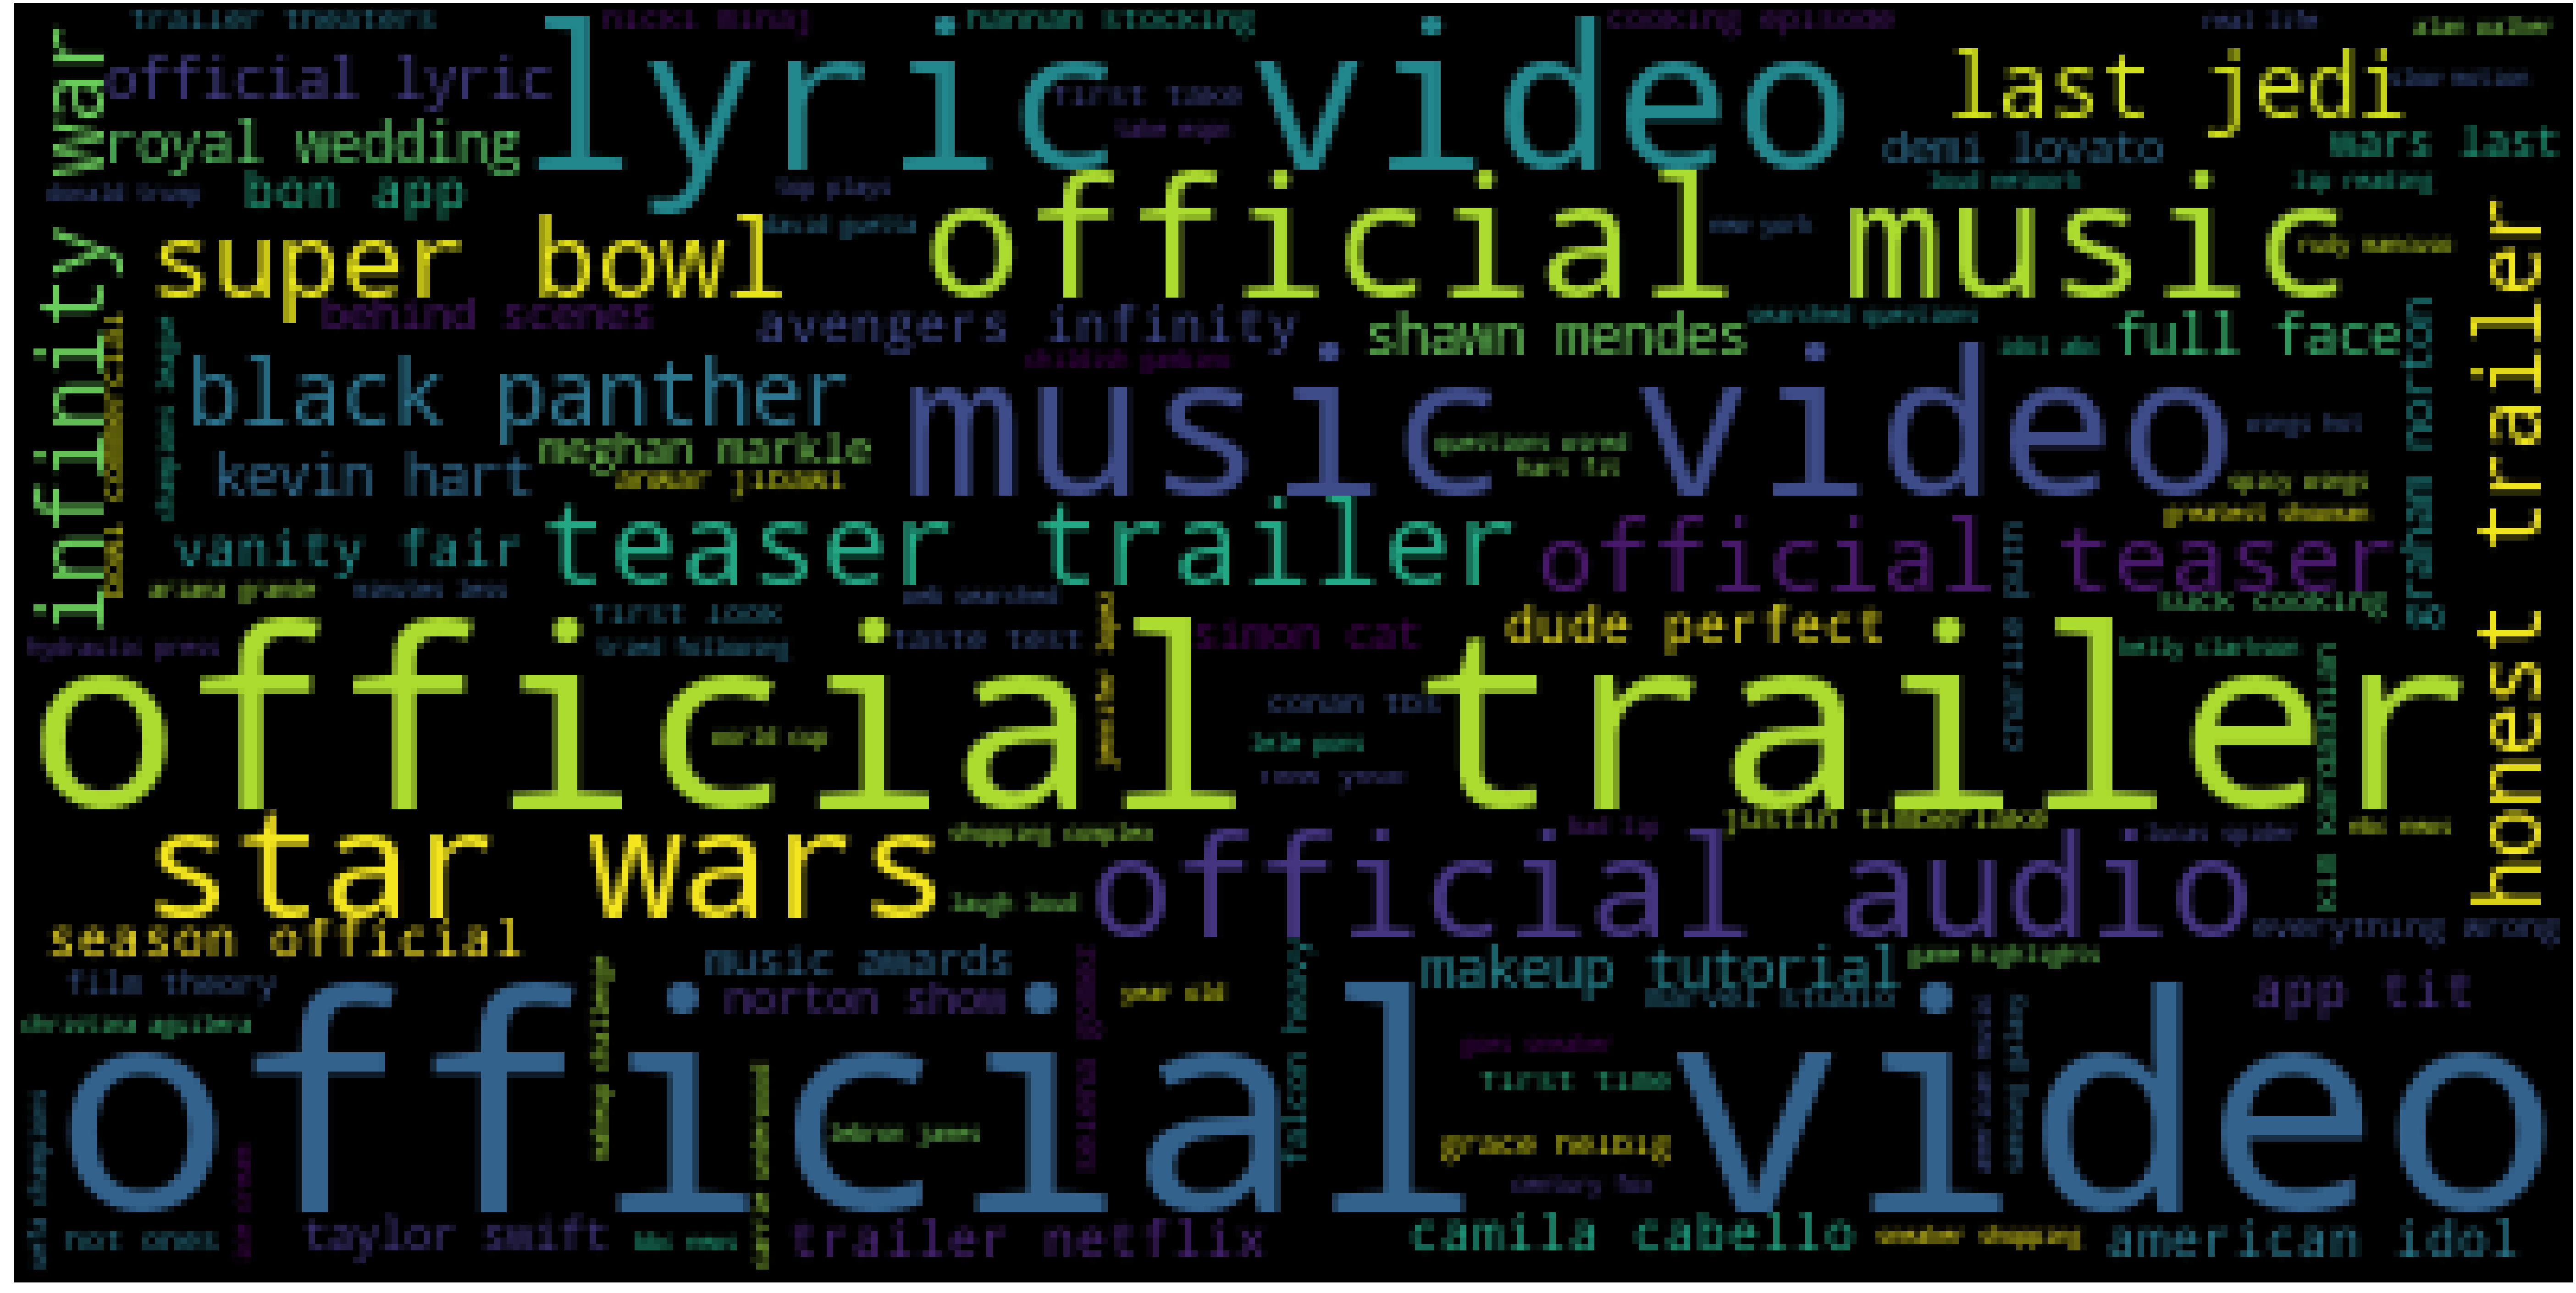

In [16]:
wc(cleaned_data_title,'black','Common Words')


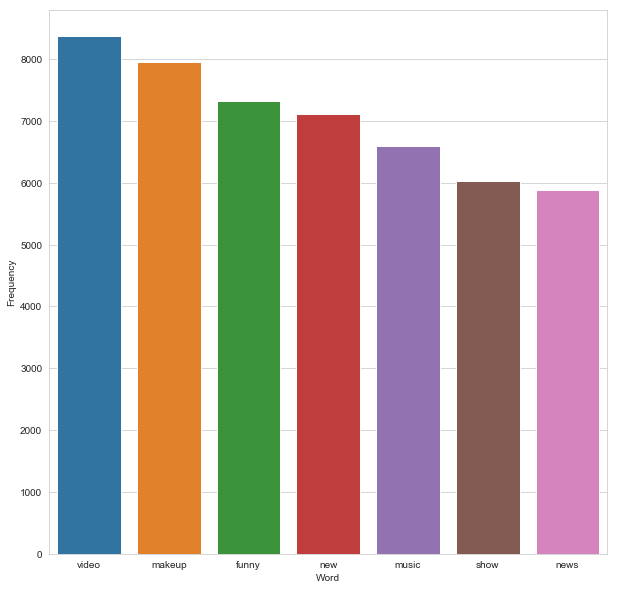

In [17]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

tags_lower = USvideos['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))


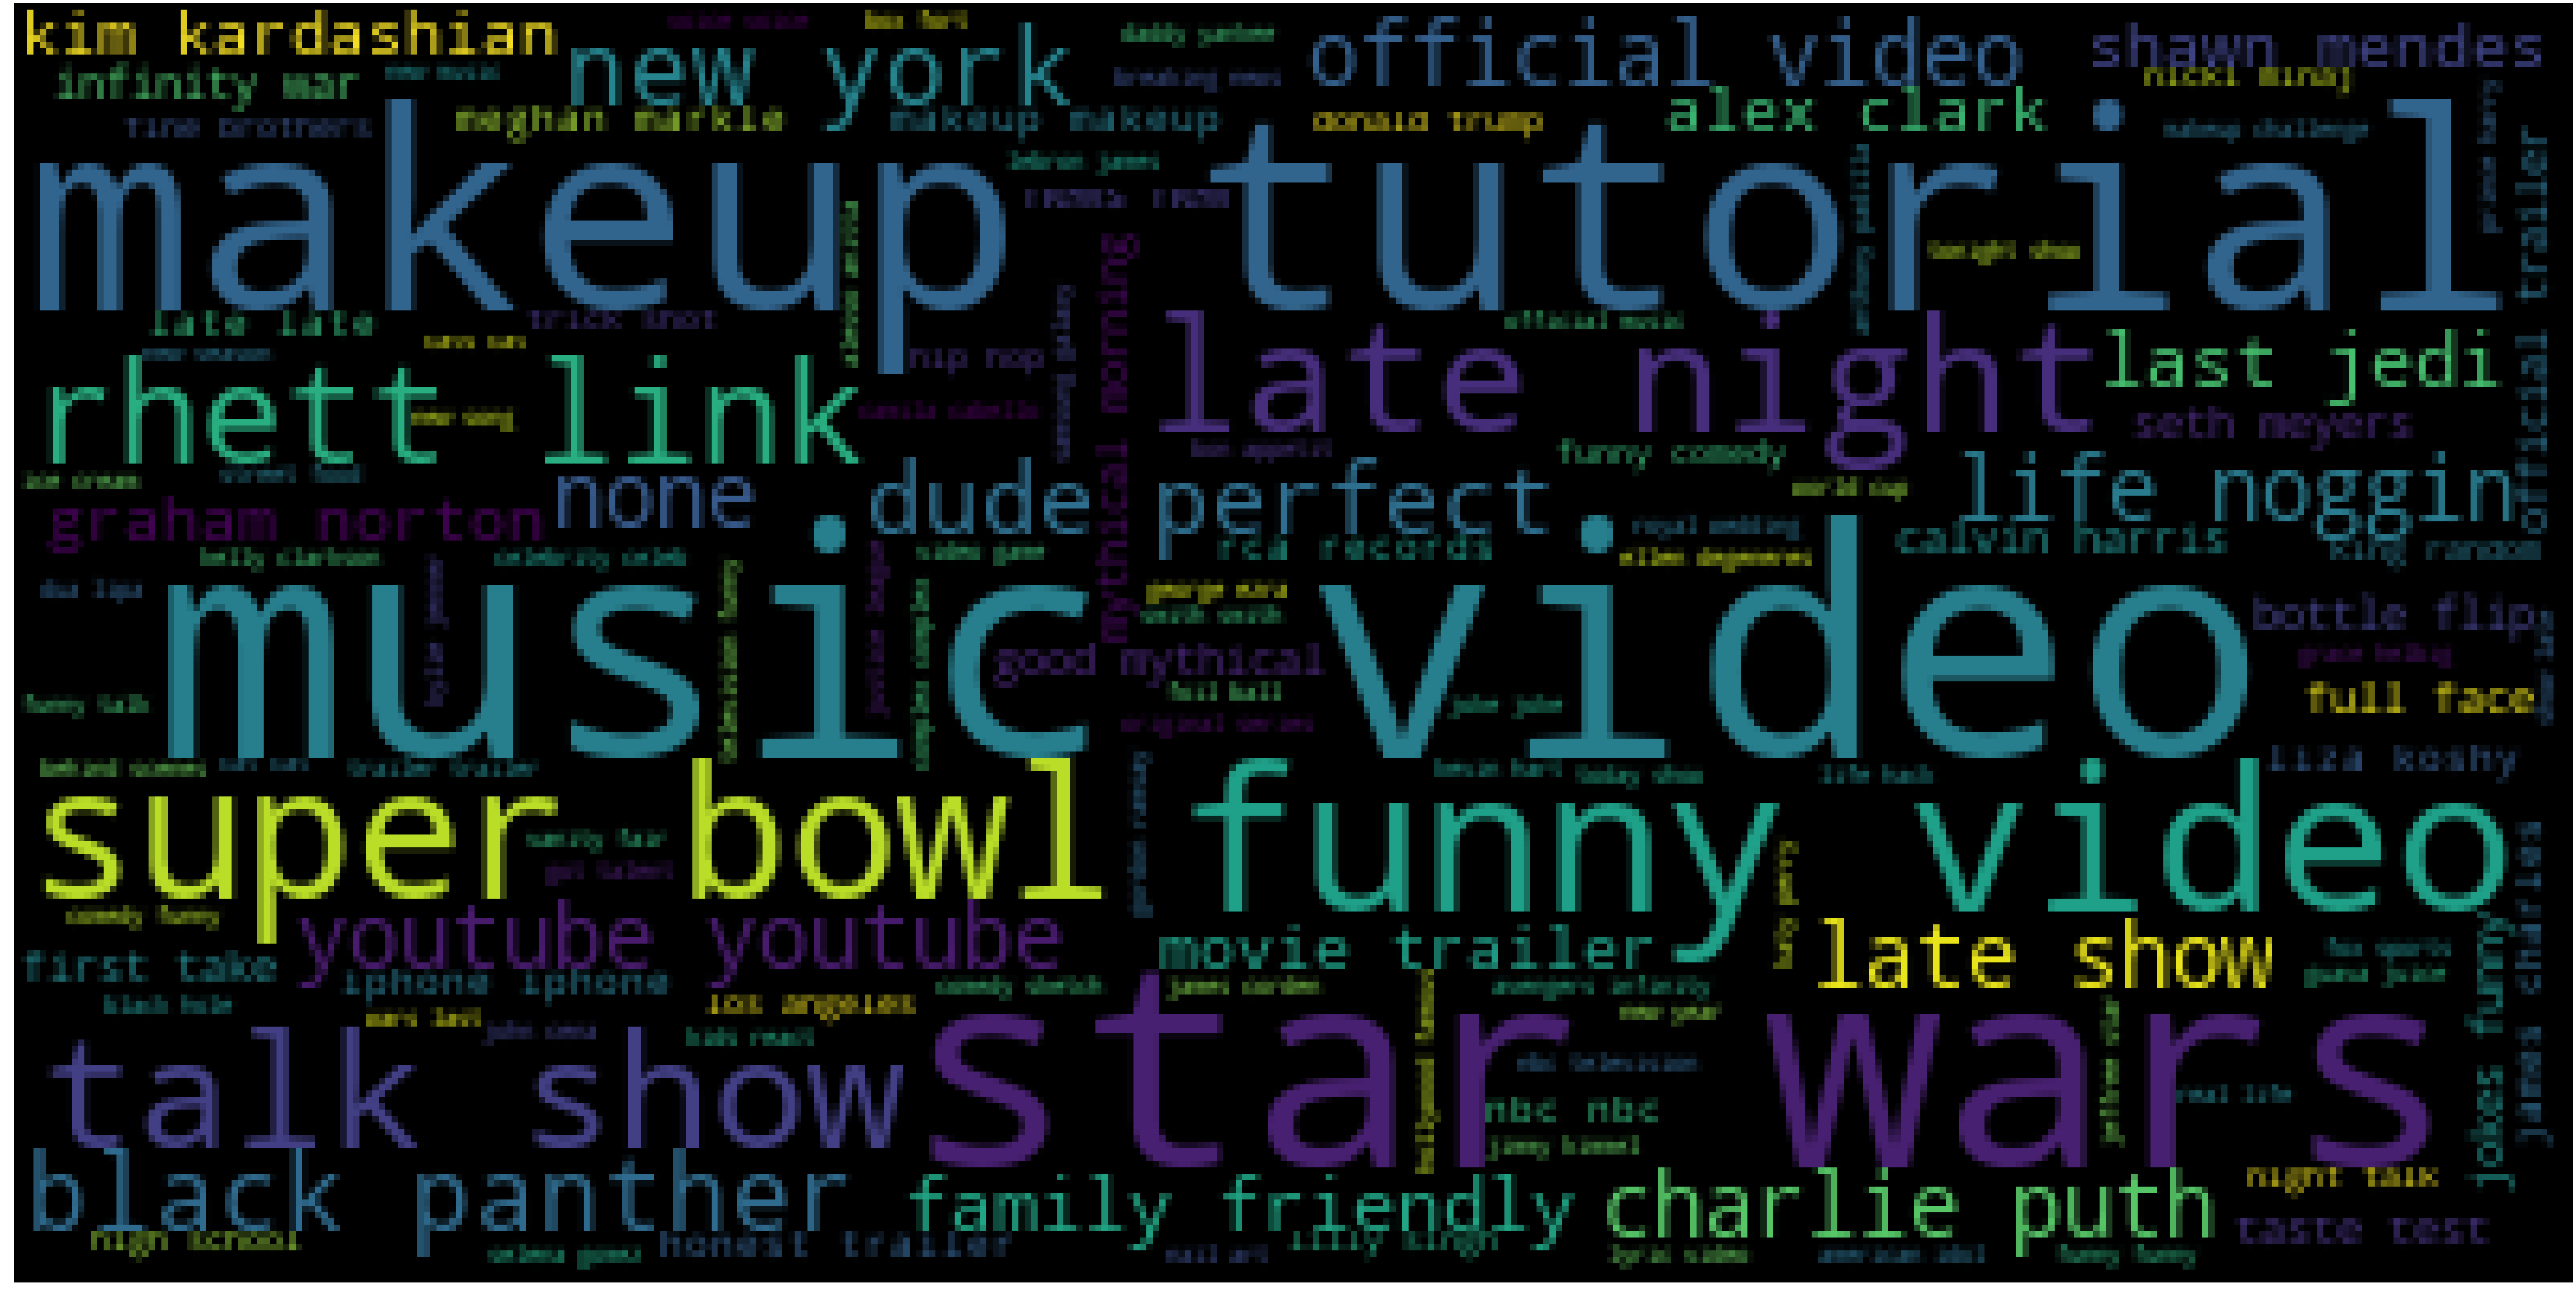

In [18]:
wc(cleaned_data_tags,'black','Common Words' )


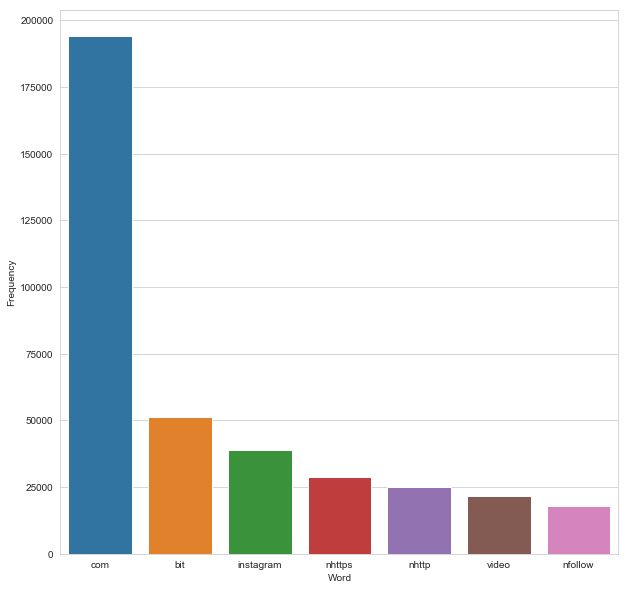

In [24]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = USvideos['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words.extend(["www", "twitter", "facebook", "https", "http", "youtube", "twitter"])



word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [27]:
USvideos["title"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_desc
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [29]:
#Import Word2vec library en_core_web_md, NLTK and lemamtizers
import en_core_web_md
import spacy
nlp = en_core_web_md.load()
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [30]:
#lemmatizer and tokenizer

%%time

def tokenize_lemmatize(x):
    
    s = ''
    for i in nltk.word_tokenize(x):
        i = i.lower()
        i = lemmatizer.lemmatize(i)
        s += i+ ' '

    return s.strip()
            
USvideos["title"] = USvideos["title"].apply(lambda x: tokenize_lemmatize(x))

    

CPU times: user 13.4 s, sys: 245 ms, total: 13.6 s
Wall time: 14.3 s


In [38]:
#Manipulating the title to remove punctuations
USvideos["title"] = USvideos["title"].str.replace('[^\w\s]','')


In [39]:
USvideos["title"].head(5)

0                   we want to talk about our marriage
1    the trump presidency  last week tonight with j...
2    racist superman  rudy mancuso  king bach  lele...
3                      nickelback lyric  real or fake 
4                             i dare you  going bald  
Name: title, dtype: object

In [44]:
#Vectorizer for inputs

%%time

def vectorize(doc1):
    vector1 = np.zeros(300)
    #vector2 = np.zeros(300)
    for token in doc1:
        if (token.text not in stop_words):
            vector1 = vector1 + token.vector
    vector1 = np.divide(vector1, len(doc1))
    return vector1

x = {}

for i in USvideos.index:
    x[i] = vectorize(nlp(USvideos['title'].loc[i]))
#

CPU times: user 7min 28s, sys: 5.2 s, total: 7min 33s
Wall time: 8min


In [77]:
#Creating training set

XTRAIN = pd.DataFrame(x.values(), index = USvideos.index)

In [108]:
XTRAIN.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.027812,0.023889,-0.078397,0.098138,0.101216,-0.050316,0.089680,-0.210713,0.074128,1.178814,...,0.069895,-0.031920,-0.138705,0.010430,0.047413,0.026526,-0.103905,0.040541,0.042517,0.089351
1,-0.060752,0.178609,0.215549,-0.019328,-0.055249,-0.097724,-0.057643,-0.072654,0.072489,1.086007,...,0.148071,0.093526,-0.014167,0.010470,0.122464,-0.050345,-0.024284,-0.129777,-0.167062,-0.119889
2,-0.010417,-0.044718,0.000107,-0.052231,-0.113910,0.073996,0.142442,-0.152373,0.057492,0.243438,...,0.161776,-0.039265,-0.004999,-0.049210,0.290896,0.076068,0.044253,-0.030990,-0.023169,0.071470
3,-0.246081,0.060182,-0.039762,-0.164307,0.011960,-0.057423,0.185488,-0.220083,0.034458,0.768268,...,-0.096795,0.098414,-0.019202,-0.048368,0.203981,0.047907,-0.214787,-0.108261,0.094425,0.174733
4,-0.130108,-0.149699,-0.176462,0.019536,0.008706,-0.016516,0.056429,0.070752,-0.005778,0.872114,...,-0.041024,-0.014428,-0.139803,-0.156104,-0.020458,0.096697,0.006026,0.030097,0.004849,-0.058703


In [61]:
#Import libraries for Sequential models

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [63]:
#Training model

n_cols = XTRAIN.shape[1]
target = USvideos["views"]
early_stopping_monitor = EarlyStopping(patience = 3)
model = Sequential()
model.add(Dense(400, activation = "relu", input_shape = (n_cols,)))
model.add(Dense(400, activation = "relu"))
model.add(Dense(400, activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])
model.fit(XTRAIN, target, validation_split = 0.3, epochs = 20)

Train on 28664 samples, validate on 12285 samples
Epoch 1/20
28664/28664 [==============================] - 12s 402us/step - loss: 18941828715425.4023 - mean_squared_error: 18941828715425.4023 - val_loss: 129724708396015.0781 - val_mean_squared_error: 129724708396015.0781
Epoch 2/20
28664/28664 [==============================] - 10s 344us/step - loss: 16963371396277.4785 - mean_squared_error: 16963371396277.4785 - val_loss: 125595554490002.4219 - val_mean_squared_error: 125595554490002.4219
Epoch 3/20
28664/28664 [==============================] - 9s 329us/step - loss: 14982869105357.3438 - mean_squared_error: 14982869105357.3438 - val_loss: 122004344106358.8281 - val_mean_squared_error: 122004344106358.8281
Epoch 4/20
28664/28664 [==============================] - 11s 385us/step - loss: 13046216885861.0293 - mean_squared_error: 13046216885861.0293 - val_loss: 120579430338679.7031 - val_mean_squared_error: 120579430338679.7031
Epoch 5/20
28664/28664 [==============================] - 1

In [80]:
#RMSE at epoch 20
RMSE =np.sqrt(127880681936023.9531)

In [81]:
#RMSE/Mean

RMSE/USvideos["views"].mean()

4.790116778557652

In [ ]:
#Filter videos with very high virality they are causing RMSE to shoot up

new_USvideos = USvideos[(USvideos["views"]>1000) & (USvideos["views"]< 1.823157e+06)]
new_target = USvideos[USvideos.index.isin(new_USvideos.index)]["views"]
new_XTRAIN = XTRAIN[XTRAIN.index.isin(new_USvideos.index)]

In [103]:
#Model with filtering outliers

n_cols = new_XTRAIN.shape[1]
target = new_target
model = Sequential()
model.add(Dense(400, activation = "relu", input_shape = (n_cols,)))
model.add(Dense(400, activation = "relu"))
model.add(Dense(400, activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])
model.fit(new_XTRAIN, target, validation_split = 0.3, epochs = 20)

Train on 21479 samples, validate on 9206 samples
Epoch 1/20
21479/21479 [==============================] - 9s 426us/step - loss: 235945530886.5552 - mean_squared_error: 235945530886.5552 - val_loss: 353319202217.1279 - val_mean_squared_error: 353319202217.1279
Epoch 2/20
21479/21479 [==============================] - 8s 368us/step - loss: 193328923215.1635 - mean_squared_error: 193328923215.1635 - val_loss: 325225317512.3702 - val_mean_squared_error: 325225317512.3702
Epoch 3/20
21479/21479 [==============================] - 7s 324us/step - loss: 185416487699.3916 - mean_squared_error: 185416487699.3916 - val_loss: 324438874891.0676 - val_mean_squared_error: 324438874891.0676
Epoch 4/20
21479/21479 [==============================] - 7s 312us/step - loss: 180780410344.2343 - mean_squared_error: 180780410344.2343 - val_loss: 339956198294.7747 - val_mean_squared_error: 339956198294.7747
Epoch 5/20
21479/21479 [==============================] - 7s 349us/step - loss: 177833309823.4577 - mea

In [109]:
New_RMSE = np.sqrt(338304642188.3745)

In [110]:
np.sqrt(338304642188.3745)/new_USvideos["views"].mean()

1.039444970568266

In [106]:
#Final Model
model.save("views_predict.h5")